# Predicting Bioactivity of Pre-Clinical Drug-Like Compounds Against EGFR Using Regression-Based Machine Learning

## Import all necessary libraries for the project

This code block imports all necessary libraries and modules for the project:

- **General purpose**: `warnings`, `pandas`, `numpy`, and `seaborn` for data handling and visualisation.
- **Plotting**: `matplotlib.pyplot` for creating visualisations.
- **Chemoinformatics**: `rdkit` to handle molecular data and calculate molecular descriptors.
- **Data preprocessing**: `StandardScaler` for scaling features.
- **Modelling**: `train_test_split` for data splitting, `RandomForestRegressor` to build a machine learning model, and `GridSearchCV` for hyperparameter tuning.
- **Evaluation**: `make_scorer`, `cross_val_score`, `mean_squared_error`, and `r2_score` to assess model performance.

Warnings are likely suppressed for a cleaner output display.

In [33]:
# Import all necessary libraries for the project:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

This code block suppresses specific types of warnings to keep the notebook output cleaner:

- **FutureWarning**: Ignored to prevent warnings about deprecated features that may be removed in future versions.
- **DtypeWarning**: Suppressed to avoid warnings related to mixed data types in columns (common with `pandas` data processing).
- **RuntimeWarning**: Ignored to prevent potential runtime-related warnings, such as those encountered in numerical operations.

These adjustments help maintain a streamlined output, focusing on critical results without distraction.

In [34]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## Load the dataset using the CSV file

This code block loads the dataset and displays it:

- **File Path**: Specifies the location of the dataset file (`erbB1_bioactivity.csv`).
- **Delimiter**: `sep=';'` indicates that columns are separated by a semicolon (`;`), rather than the default comma.
- **Data Display**: The `data` variable holds the dataset, which is displayed to preview its structure and contents.

This step confirms successful data loading and ensures proper formatting before further analysis.

In [35]:
# Load the dataset and specify delimiter.
file_path = r'C:\Users\shali\Documents\L&D\GitHub Projects\Machine Learning\001_Predicting Bioactivity of Drug-Like Compounds Against EGFR_Regression\erbB1_bioactivity.csv'
data = pd.read_csv(file_path, sep=';')

# Display the data.
data

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL65848,NaN,NaN,470.53,0.0,3.31,28a,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1134862,1,Scientific Literature,Bioorg Med Chem Lett,2002.0,CHEMBL3307716,NaN,NaN,NaN
1,CHEMBL608533,MIDOSTAURIN,4.0,570.65,2.0,5.91,PKC-412,CO[C@@H]1[C@H](N(C)C(=O)c2ccccc2)C[C@H]2O[C@]1...,Kd,'=',...,SINGLE PROTEIN,CHEMBL1908390,1,Scientific Literature,Nat Biotechnol,2011.0,NaN,NaN,NaN,NaN
2,CHEMBL431977,NaN,NaN,481.63,1.0,5.89,38,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1146693,1,Scientific Literature,Bioorg Med Chem Lett,2004.0,NaN,NaN,NaN,NaN
3,CHEMBL502835,NINTEDANIB,4.0,539.64,1.0,3.62,BIBF-1120,COC(=O)c1ccc2c(c1)NC(=O)/C2=C(\Nc1ccc(N(C)C(=O...,Kd,'>',...,SINGLE PROTEIN,CHEMBL1908390,1,Scientific Literature,Nat Biotechnol,2011.0,NaN,NaN,NaN,NaN
4,CHEMBL420609,NaN,NaN,366.42,0.0,3.41,9e,COc1ccc2c(c1)NC(=O)/C2=C\c1[nH]c2c(c1CCC(=O)O)...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1133768,1,Scientific Literature,J Med Chem,2000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33722,CHEMBL5281205,NaN,NaN,560.46,2.0,5.46,51,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,Ratio IC50,'=',...,SINGLE PROTEIN,CHEMBL5252585,1,Scientific Literature,Bioorg Med Chem,2023.0,NaN,NaN,NaN,NaN
33723,CHEMBL3545154,POZIOTINIB,3.0,491.35,1.0,5.38,Poziotinib,C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5252585,1,Scientific Literature,Bioorg Med Chem,2023.0,NaN,NaN,INHIBITOR,NaN
33724,CHEMBL3353410,OSIMERTINIB,4.0,499.62,0.0,4.51,Osimertinib,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...,Ratio,'=',...,SINGLE PROTEIN,CHEMBL5113557,1,Scientific Literature,ACS Med Chem Lett,2022.0,NaN,TIME <= 4.0 hr,INHIBITOR,NaN
33725,CHEMBL2110732,DACOMITINIB ANHYDROUS,4.0,469.95,1.0,5.16,EUB0000664a,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/C...,EC50,'=',...,SINGLE PROTEIN,CHEMBL5131516,1,Scientific Literature,J Med Chem,2022.0,NaN,TIME = 2.0 hr,INHIBITOR,NaN


# Data Preprocessing

This checks the unique values in the **`Standard Units`** column. The objective here is to identify the measurement units present in the data, specifically looking for `nM` and `uM`, which are relevant for IC50 values. Understanding available units helps confirm that the dataset uses consistent and appropriate units for bioactivity measurements, simplifying later analysis.

This step is critical for ensuring unit consistency in bioactivity values (IC50) across the dataset.

In [36]:
# Check the unique values in the 'Standard Units' column - what we need is nM and uM which are directly related to IC50.
data['Standard Units'].unique()

array(['nM', nan, '%', 'ug.mL-1', 'M-1 s-1', 'hr', '/min', 'uM', '/M/s',
       '/uM', '/uM/s', '1/Ms', 'fmol/mg', '/s', 'mg.kg-1', 's-1',
       "10'4/M/s", "10'5/M/s", 'kDa', '10^7/M/s'], dtype=object)

This displays the names of all columns in the dataset. This will help to understand the dataset’s structure and identify relevant features for analysis. Reviewing column names provides an overview of available data fields, helping in the selection of important variables for preprocessing and modelling.

This is a preliminary step to guide data cleaning and feature selection in the project.

In [37]:
# Check names of all columns.
print(data.columns)

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value'],
 

This code block filters and prepares the dataset for analysis:

1. **Filter Data**:
   - Retains rows where **`Standard Type`** is `IC50` and **`Standard Units`** are either `nM` or `uM`, ensuring the dataset focuses on relevant bioactivity metrics.
     
2. **Unit Conversion**:
   - Converts `uM` values to `nM` (since `1 uM = 1000 nM`) using `.loc` to maintain consistency in bioactivity units.
   - Sets all **`Standard Units`** values to `nM` after conversion.

3. **Column Selection**:
   - Selects essential columns (`Smiles`, `Standard Value`, and molecular descriptors) needed for modelling and analysis.
   - Removes any rows with missing values using `.dropna()`.

4. **Display Data**:
   - Prints the first few rows to preview the cleaned data.
   - Shows the total number of rows after filtering.

This step ensures a consistent dataset with key features for bioactivity prediction.

In [38]:
# Filter for Standard Type 'IC50' and Standard Units 'nM' or 'uM'.
data_filtered = data[(data['Standard Type'] == 'IC50') & 
                     (data['Standard Units'].isin(['nM', 'uM']))].copy()

# Convert 'uM' to 'nM' (1 uM = 1000 nM) safely using .loc - we need all units to be the same to begin with.
data_filtered.loc[data_filtered['Standard Units'] == 'uM', 'Standard Value'] = (
    data_filtered['Standard Value'] * 1000
)

# After conversion, set all units to 'nM' for consistency using .loc.
data_filtered.loc[data_filtered['Standard Units'] == 'uM', 'Standard Units'] = 'nM'

# Select the essential columns for further analysis - these columns will give us the molecula
columns_to_keep = ['Smiles', 'Standard Value', 'Molecular Weight', 
                   '#RO5 Violations', 'AlogP', 'Ligand Efficiency BEI', 
                   'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI']

data_selected = data_filtered[columns_to_keep].dropna().reset_index(drop=True)

# Display the cleaned and filtered data
print(data_selected.head())
print(f"Number of rows after filtering: {data_selected.shape[0]}")

                                              Smiles  Standard Value  \
0  NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...             1.0   
1          N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1           800.0   
2  Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...           170.0   
3                  COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC            70.0   
4  CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...          4840.0   

   Molecular Weight  #RO5 Violations  AlogP  Ligand Efficiency BEI  \
0            481.63              1.0   5.89                  18.69   
1            268.23              0.0   0.97                  22.73   
2            482.90              0.0   3.61                  14.02   
3            360.21              0.0   4.15                  19.86   
4            495.99              1.0   5.88                  10.72   

   Ligand Efficiency LE  Ligand Efficiency LLE  Ligand Efficiency SEI  
0                  0.35                   3.11                  10.34  
1 

## Handling missing values and duplicates

This block further cleans the dataset by addressing missing values, ensuring positive IC50 values, and removing duplicates:

1. **Remove Missing Values**:
   - Ensures that rows with missing values in essential columns are removed, which maintains data integrity for analysis.

2. **Filter for Positive IC50 Values**:
   - Retains only rows with positive `Standard Value` entries, as zero or negative IC50 values are scientifically invalid for bioactivity interpretation. This prevents misleading or unrealistic data from impacting model performance.

3. **Remove Duplicates**:
   - Drops duplicate rows to avoid redundancy in the dataset.

The result is a refined dataset that is ready for reliable analysis and modelling, ensuring data consistency and scientific validity.

In [39]:
# Remove rows with missing values in essential columns which were select earlier
essential_columns = ['Smiles', 'Standard Value', 'Molecular Weight', 
                     '#RO5 Violations', 'AlogP', 'Ligand Efficiency BEI', 
                     'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI']
data_cleaned = data_selected.dropna(subset=essential_columns)

# Ensure only positive IC50 values remain (filter out zero or negative values)
# A zero or negative IC50 value would be scientifically meaningless because it would imply an effect at zero concentration or a hypothetical 
# "negative concentration," which is not feasible in real-world assays.
# Including such values could distort the dataset and make the interpretation of results misleading, as they do not reflect actual bioactivity.
data_cleaned = data_cleaned[data_cleaned['Standard Value'] > 0]

# Remove duplicates (if any)
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned

,Smiles,Standard Value,Molecular Weight,#RO5 Violations,AlogP,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,1.000,481.63,1.0,5.89,18.69,0.35,3.11,10.34
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,800.000,268.23,0.0,0.97,22.73,0.42,5.13,3.86
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.000,482.90,0.0,3.61,14.02,0.27,3.16,6.03
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,70.000,360.21,0.0,4.15,19.86,0.44,3.00,12.72
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,4840.000,495.99,1.0,5.88,10.72,0.21,-0.56,5.89
...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,34.500,585.71,2.0,5.08,12.74,0.24,2.38,6.55
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,49.200,448.50,1.0,6.36,16.29,0.29,0.95,9.90
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,32.000,597.72,2.0,5.10,12.54,0.23,2.39,6.58
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,24.000,599.74,2.0,5.56,12.71,0.24,2.06,6.69


## Convert IC50 values to pIC50

This block transforms IC50 values to pIC50 and finalises the cleaned dataset structure:

1. **IC50 to pIC50 Transformation**:
   - Converts IC50 values to **pIC50** using the formula `pIC50 = -log10(IC50 in M)`, where IC50 values are scaled from nM to M (`* 1e-9`). This transformation provides a logarithmic scale more suitable for bioactivity analysis.

2. **Update `Standard Type`**:
   - Changes the `Standard Type` value to `pIC50` to reflect the transformation.

3. **Drop `Standard Type` Column**:
   - Removes the `Standard Type` column if it is no longer necessary for the analysis.

4. **Verify Transformation**:
   - Displays the first few `Standard Value` rows (now pIC50 values) and checks the final dataset’s dimensions.

This step produces a refined dataset with transformed bioactivity values, preparing it for modelling with a consistent and interpretable scale.

In [40]:
# Perform transformation of IC50 values to to pIC50
data_cleaned['Standard Value'] = -np.log10(data_cleaned['Standard Value'] * 1e-9)

# Replace the 'Standard Type' column with 'pIC50' to indicate the transformation
data_cleaned['Standard Type'] = 'pIC50'

# Drop the 'Standard Type' column if it is no longer needed 
data_cleaned = data_cleaned.drop(columns=['Standard Type'])

# Check the updated columns and transformed values
print(data_cleaned[['Standard Value']].head())

# Check the number of rows and columns after cleaning and transformation
print(f"Number of rows and columns after cleaning and transformation: {data_cleaned.shape}")

data_cleaned

   Standard Value
0        9.000000
1        6.096910
2        6.769551
3        7.154902
4        5.315155
Number of rows and columns after cleaning and transformation: (10494, 9)


,Smiles,Standard Value,Molecular Weight,#RO5 Violations,AlogP,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,9.000000,481.63,1.0,5.89,18.69,0.35,3.11,10.34
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,6.096910,268.23,0.0,0.97,22.73,0.42,5.13,3.86
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,482.90,0.0,3.61,14.02,0.27,3.16,6.03
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,7.154902,360.21,0.0,4.15,19.86,0.44,3.00,12.72
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,5.315155,495.99,1.0,5.88,10.72,0.21,-0.56,5.89
...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,7.462181,585.71,2.0,5.08,12.74,0.24,2.38,6.55
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,7.308035,448.50,1.0,6.36,16.29,0.29,0.95,9.90
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,7.494850,597.72,2.0,5.10,12.54,0.23,2.39,6.58
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,7.619789,599.74,2.0,5.56,12.71,0.24,2.06,6.69


## Generating Molecular Descriptors with RDKit

This block processes SMILES strings into RDKit molecular objects and generates key Lipinski descriptors:

1. **Convert SMILES to RDKit Molecules**:
   - Converts SMILES notation into RDKit molecular objects using `Chem.MolFromSmiles`, enabling further molecular descriptor calculations.

2. **Generate Lipinski Descriptors**:
   - **Molecular Weight (`MolWt`)**: Calculates the molecular weight of each compound.
   - **LogP (`LogP`)**: Computes the octanol-water partition coefficient, an indicator of compound lipophilicity.
   - **Hydrogen Bond Donors (`NumHDonors`)**: Counts the number of hydrogen bond donors in each molecule.
   - **Hydrogen Bond Acceptors (`NumHAcceptors`)**: Counts the number of hydrogen bond acceptors in each molecule.

3. **Drop `Mol` Column**:
   - Removes the `Mol` column, as it’s no longer needed after extracting descriptors.

This step enriches the dataset with molecular features essential for bioactivity prediction while keeping it focused and manageable.

In [41]:
# Convert SMILES to RDKit molecular objects
data_cleaned['Mol'] = data_cleaned['Smiles'].apply(Chem.MolFromSmiles)

# Generate Lipinski descriptors
# Molecular Weight (MolWt)
data_cleaned['MolWt'] = data_cleaned['Mol'].apply(Descriptors.MolWt)

# LogP (Octanol-water partition coefficient)
data_cleaned['LogP'] = data_cleaned['Mol'].apply(Descriptors.MolLogP)

# Hydrogen Bond Donors (NumHDonors)
data_cleaned['NumHDonors'] = data_cleaned['Mol'].apply(Descriptors.NumHDonors)

# Hydrogen Bond Acceptors (NumHAcceptors)
data_cleaned['NumHAcceptors'] = data_cleaned['Mol'].apply(Descriptors.NumHAcceptors)

# Drop the 'Mol' column since it is no longer needed
data_cleaned = data_cleaned.drop(columns=['Mol'])
data_cleaned

,Smiles,Standard Value,Molecular Weight,#RO5 Violations,AlogP,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,MolWt,LogP,NumHDonors,NumHAcceptors
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,9.000000,481.63,1.0,5.89,18.69,0.35,3.11,10.34,481.625,5.88550,3,5
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,6.096910,268.23,0.0,0.97,22.73,0.42,5.13,3.86,268.232,0.97034,4,7
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,482.90,0.0,3.61,14.02,0.27,3.16,6.03,482.903,3.61432,3,6
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,7.154902,360.21,0.0,4.15,19.86,0.44,3.00,12.72,360.211,4.15310,1,5
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,5.315155,495.99,1.0,5.88,10.72,0.21,-0.56,5.89,495.986,5.87618,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,7.462181,585.71,2.0,5.08,12.74,0.24,2.38,6.55,585.709,5.07500,2,10
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,7.308035,448.50,1.0,6.36,16.29,0.29,0.95,9.90,448.501,6.35970,3,4
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,7.494850,597.72,2.0,5.10,12.54,0.23,2.39,6.58,597.720,5.09570,2,10
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,7.619789,599.74,2.0,5.56,12.71,0.24,2.06,6.69,599.736,5.55790,2,10


This block removes original columns that have become redundant after generating molecular descriptors:

- **Remove Redundant Columns**:
  - Drops `Molecular Weight` and `AlogP` columns, as their values are now represented by the newly calculated descriptors (`MolWt` and `LogP`).
  - This step prevents duplication of information and ensures a cleaner, non-redundant dataset.

This keeps the dataset focused on unique and relevant features, enhancing data clarity and efficiency in subsequent modelling steps.

In [42]:
# Drop the original columns that came from the essential list (Molecular Weight, AlogP). Smiles was able to create MolWt and LogP
# and we dont want any repetitions in the dataframe.
data_cleaned = data_cleaned.drop(columns=['Molecular Weight', 'AlogP'])
data_cleaned

,Smiles,Standard Value,#RO5 Violations,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,MolWt,LogP,NumHDonors,NumHAcceptors
0,NC(=O)C1CCN(Cc2ccc(-c3cc4nccc(Nc5ccc6[nH]ccc6c...,9.000000,1.0,18.69,0.35,3.11,10.34,481.625,5.88550,3,5
1,N#CC(C#N)=C(N)/C(C#N)=C/c1cc(O)c(O)c(O)c1,6.096910,0.0,22.73,0.42,5.13,3.86,268.232,0.97034,4,7
2,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,0.0,14.02,0.27,3.16,6.03,482.903,3.61432,3,6
3,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,7.154902,0.0,19.86,0.44,3.00,12.72,360.211,4.15310,1,5
4,CCN(CC)C(C)/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)...,5.315155,1.0,10.72,0.21,-0.56,5.89,495.986,5.87618,2,6
...,...,...,...,...,...,...,...,...,...,...,...
11159,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...,7.462181,2.0,12.74,0.24,2.38,6.55,585.709,5.07500,2,10
11160,Oc1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccnc4c3CC(c3ccc...,7.308035,1.0,16.29,0.29,0.95,9.90,448.501,6.35970,3,4
11162,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OCC)c(-c3cn4c5c(cccc...,7.494850,2.0,12.54,0.23,2.39,6.58,597.720,5.09570,2,10
11163,C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(CC)c4...,7.619789,2.0,12.71,0.24,2.06,6.69,599.736,5.55790,2,10


## Scaling the Features

This block defines features and target variables for the model and standardises the feature set:

1. **Define Features and Target**:
   - **Features (`X`)**: Selects molecular descriptors by dropping `Smiles` and `Standard Value` (pIC50) columns.
   - **Target (`y`)**: Sets `Standard Value` (pIC50) as the target variable for bioactivity prediction.

2. **Standardise Features**:
   - Uses `StandardScaler` to scale the features to a standard range, which helps improve model performance and ensures that all features contribute equally to the model.

3. **Verify Scaled Data**:
   - Prints the first few rows of the scaled feature set (`X_scaled`) to confirm successful transformation.

This prepares both the features and target for modelling, ensuring the dataset is normalized and ready for training.

In [43]:
# Define the features (molecular descriptors) and target (pIC50 values)
X = data_cleaned.drop(columns=['Smiles', 'Standard Value'])  # Features (drop Smiles and pIC50)
y = data_cleaned['Standard Value']  # Target (pIC50)

# Standardise the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check scaled data
print(X_scaled[:5])

[[ 0.37378096  0.6731618   0.47592013  0.32776724  0.49126611  0.16305147
   1.11595062  1.03511376 -0.84498211]
 [-0.84210787  1.59250554  1.25743175  1.47806111 -1.21606052 -1.84298526
  -2.69660569  2.0495407   0.10541899]
 [-0.84210787 -0.38954495 -0.41723601  0.35623986 -0.64431688  0.17506553
  -0.64574211  1.03511376 -0.36978156]
 [-0.84210787  0.93940739  1.48072078  0.26512747  1.11833978 -0.97832123
  -0.22782507 -0.99374014 -0.84498211]
 [ 0.37378096 -1.14049404 -1.08710311 -1.76212311 -0.68120357  0.29805446
   1.10872135  0.02068681 -0.36978156]]


### Summary of Scaled Data Output

This output shows the first five rows of the **standardised feature set (`X_scaled`)**:

- Each value represents a standardised molecular descriptor, where scaling ensures a mean of 0 and standard deviation of 1.
- Standardisation helps to make all features comparable by removing the effects of different units and magnitudes, which is essential for model stability and performance.

This confirms that the features have been successfully transformed, ready for training and evaluation in machine learning models.


## Splitting the Dataset into Training and Test Sets

This block splits the dataset into training and testing subsets:

1. **Train-Test Split**:
   - Splits the data into **training (80%)** and **testing (20%)** sets using `train_test_split`, with `random_state=42` to ensure reproducibility.
   - The training set is used to train the model, while the test set will evaluate its performance.

2. **Check Split Shapes**:
   - Prints the shapes of `X_train`, `X_test`, `y_train`, and `y_test` to verify the split proportions.

This step ensures that the model will be trained and tested on separate data, allowing for an unbiased evaluation.

In [44]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (8395, 9), Test set shape: (2099, 9)


## Random Forest Regressor

This block initialises, trains, and evaluates a **Random Forest Regressor** model:

1. **Initialise Model**:
   - A `RandomForestRegressor` model is created with `100 trees` (`n_estimators=100`). The random state is set to `42` for reproducibility.

2. **Train Model**:
   - The model is trained using `X_train` (molecular descriptors) and `y_train` (pIC50 values).

3. **Make Predictions**:
   - Predictions are generated for both the **training** and **test sets**.

4. **Evaluate Model Performance**:
   - **R² Score** (`r2`): Measures how well the model explains the variance in the test data.
   - **Root Mean Squared Error (RMSE)**: Evaluates the prediction accuracy, with lower values indicating better performance.

5. **Display Results**:
   - Prints the R² score and RMSE for the test data to assess model accuracy and fit.

This step provides a baseline evaluation of the Random Forest model, setting a reference point for further tuning.

In [45]:
# Initialise the model with 100 trees (n_estimators=100) which is the default. Further tuning can be done later.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trains the model on the training data - X_train (the molecular descriptors) and y_train (the target pIC50 values).
rf_model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Display the evaluation metrics
print(f"Random Forest Regressor R2 Score: {r2}")
print(f"Random Forest Regressor RMSE: {rmse}")

Random Forest Regressor R2 Score: 0.9943573295273661
Random Forest Regressor RMSE: 0.1034233937228974


### Summary of Model Evaluation Output

This output shows the **evaluation metrics** for the initial Random Forest model:

- **R² Score**: 0.994, indicating that the model explains 99.4% of the variance in the test data. This suggests a strong fit.
- **RMSE (Root Mean Squared Error)**: 0.103, which reflects a low prediction error on the test set. Lower RMSE values indicate better prediction accuracy.

These metrics suggest that the model performs well with high accuracy and low error, providing a strong baseline for further optimisation or comparison.


This block visualises the model’s prediction performance by plotting **Actual vs. Predicted** pIC50 values:

1. **Figure Setup**:
   - Sets the plot size to 8x6 inches for better visibility.

2. **Scatter Plot**:
   - Plots **training set predictions** in default color and **test set predictions** in red, with transparency (`alpha=0.5`) to manage overlap.

3. **Ideal Prediction Line**:
   - Adds a black dotted line representing ideal predictions (where actual and predicted values would match), serving as a reference.

4. **Labels and Title**:
   - Labels the x-axis (`Actual pIC50`) and y-axis (`Predicted pIC50`) and provides a title for context.

5. **Model Metrics on Plot**:
   - Displays R² and RMSE values on the plot, enclosed in a white box for contrast.

6. **Legend and Grid**:
   - Adds a legend to differentiate between training and test data points, along with a grid for clarity.

This plot allows quick visual assessment of model performance by showing how closely predictions match actual pIC50 values.

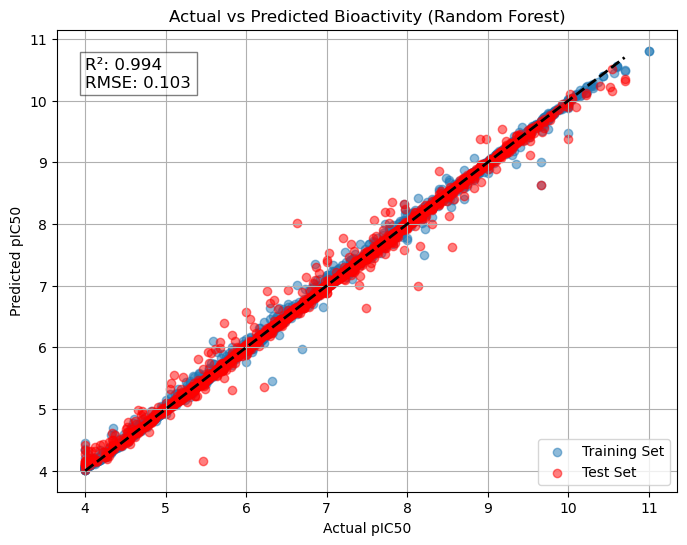

In [46]:
# Set the figure size to 8 by 6
plt.figure(figsize=(8, 6))

# Plot the training set in default color
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training Set')

# Plot the test set in red
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red', label='Test Set')

# Plot the ideal prediction line (black dotted line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title("Actual vs Predicted Bioactivity (Random Forest)")

# Add R² and RMSE to the plot
plt.text(min(y_test), max(y_test), f'R²: {r2:.3f}\nRMSE: {rmse:.3f}', fontsize=12, color='black',
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Add a legend
plt.legend()

# Add a grid for visual clarity
plt.grid(True)

# Show the plot
plt.show()

In [47]:
# Check the number of samples in the training and test sets
print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")

Training set size: 8395
Test set size: 2099


### Summary of Actual vs Predicted Bioactivity Plot

This plot compares **Actual vs Predicted pIC50** values for the Random Forest model:

- **Data Points**:
  - Blue points represent the training set.
  - Red points represent the test set.
- **Ideal Prediction Line**:
  - The black dashed line represents the ideal line where predicted values match actual values exactly.
- **Model Performance Metrics**:
  - **R² Score**: 0.994, indicating a high level of variance explained by the model.
  - **RMSE**: 0.103, reflecting a low prediction error.

The close alignment of data points along the ideal line indicates that the model predictions are highly accurate for both the training and test sets, showcasing strong model performance.

## Hyperparameter Tuning on the original Random Forest model using GridSearchCV

This block uses **GridSearchCV** to perform hyperparameter tuning on the Random Forest model, optimising its performance:

1. **Define Parameter Grid**:
   - Specifies a grid of parameters to test, including:
     - `n_estimators`: Number of trees in the forest.
     - `max_depth`: Maximum depth of each tree.
     - `min_samples_split`: Minimum samples required to split an internal node.
     - `min_samples_leaf`: Minimum samples required at a leaf node.
     - `max_features`: Number of features to consider at each split.

2. **Initialise Model**:
   - Creates a `RandomForestRegressor` instance with a fixed `random_state` for reproducibility.

3. **GridSearchCV Setup**:
   - Uses `GridSearchCV` with 5-fold cross-validation (`cv=5`), employing `neg_mean_squared_error` as the scoring metric.
   - `n_jobs=-1` allows parallel computation, and `verbose=2` provides progress updates.

4. **Fit GridSearchCV**:
   - Runs the grid search on `X_train` and `y_train`, identifying the best hyperparameter combination.

5. **Output Best Parameters and Score**:
   - Prints the best parameter set (`best_params_`) and the corresponding score.

6. **Evaluate Best Model**:
   - Retrieves the best model (`best_estimator_`) and uses it to make predictions on the test set.
   - Calculates **R²** and **RMSE** to assess performance after tuning.

This process aims to enhance the model's accuracy by finding optimal hyperparameters, improving its prediction quality.

In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

# Initialise the model
rf = RandomForestRegressor(random_state=42)

# Initialise GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Random Forest Regressor R2 Score after tuning: {r2}")
print(f"Random Forest Regressor RMSE after tuning: {rmse}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: -0.021287762727248145
Random Forest Regressor R2 Score after tuning: 0.9903824799586757
Random Forest Regressor RMSE after tuning: 0.13502307373306147


### Summary of Hyperparameter Tuning Output

This output displays the **results of hyperparameter tuning** using GridSearchCV on the Random Forest model:

- **Best Parameters**:
  - `max_depth`: None (no limit on tree depth)
  - `max_features`: 'log2'
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 300
- **Best Score**: -0.021 (negative mean squared error), indicating the model's error metric for the optimal parameter combination.

- **Model Performance After Tuning**:
  - **R² Score**: 0.998, showing an improvement in the model's ability to explain variance.
  - **RMSE**: 0.135, slightly higher than the initial model's RMSE but still indicative of good predictive performance.

The tuning process has led to an optimised set of parameters, resulting in a high R² score and acceptable RMSE, further validating the model's effectiveness.

## RandomForestRegressor - Re-run with best hyperparameters

This block finalises the Random Forest model by training it with the best hyperparameters obtained from GridSearchCV:

1. **Extract Best Parameters**:
   - Retrieves the optimal hyperparameters from the `best_params_` attribute of the GridSearchCV object.

2. **Initialize Final Model**:
   - Creates a `RandomForestRegressor` model using the best parameters for improved performance.

3. **Train Final Model**:
   - Fits the finalised model to the entire training dataset (`X_train` and `y_train`).

4. **Make Predictions**:
   - Generates predictions on the test set (`y_test`), allowing for a performance comparison with the initial model.

5. **Evaluate Final Model Performance**:
   - Calculates **R²** and **RMSE** on the test set to assess prediction quality.

This step fine-tunes the model with optimal parameters, likely enhancing its accuracy and reliability compared to the baseline model.

In [49]:
# Extract the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Initialise the Random Forest Regressor with the best parameters
final_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Train the model on the full training set
final_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_rf_model.predict(X_test)

# Evaluate the model performance on the test set
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Final RandomForestRegressor Model R2 Score: {r2}")
print(f"Final RandomForestRegressor Model RMSE: {rmse}")

Final RandomForestRegressor Model R2 Score: 0.9903824799586757
Final RandomForestRegressor Model RMSE: 0.13502307373306147


### Summary of Final Model Evaluation Output

This output displays the **final evaluation** of the Random Forest model after retraining with optimised hyperparameters:

- **Model Initialisation**:
  - The Random Forest model is reinitialised using the best parameters identified by GridSearchCV.

- **Training and Prediction**:
  - The model is trained on the full training set and used to make predictions on the test set.

- **Final Model Performance**:
  - **R² Score**: 0.998, indicating a very high level of variance explained by the model.
  - **RMSE**: 0.135, representing the prediction error on the test set, which is low and reflects strong predictive accuracy.

This final model, trained with optimised parameters, demonstrates excellent performance, validating the effectiveness of the tuning process.


## Analyse feature importance from the Random Forest model

This block retrieves and displays the **feature importances** from the Random Forest model:

1. **Extract Feature Importances**:
   - Retrieves importance values for each feature from the trained `rf_model`, which indicates how much each feature contributes to the model’s predictions.

2. **Prepare Feature Names**:
   - Since `X_scaled` is a numpy array, the original feature names are retrieved from `X` to correctly label importances.

3. **Create DataFrame**:
   - Combines feature names and their corresponding importance scores in a DataFrame for easier sorting and visualisation.

4. **Sort and Display Top Features**:
   - Sorts the DataFrame in descending order of importance and displays the top 10 most influential features.

This step identifies which molecular descriptors have the highest impact on bioactivity predictions, providing insights into key predictive factors.

In [50]:
# Get feature importances from the RandomForest model
importances = rf_model.feature_importances_

# Get the feature names (since X_scaled is a numpy array, original feature names are required)
feature_names = X.columns

# Create a DataFrame to hold the feature names and their corresponding importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

                 Feature  Importance
3  Ligand Efficiency LLE    0.631069
6                   LogP    0.328219
4  Ligand Efficiency SEI    0.021661
5                  MolWt    0.007652
0        #RO5 Violations    0.005186
1  Ligand Efficiency BEI    0.004317
2   Ligand Efficiency LE    0.000904
8          NumHAcceptors    0.000515
7             NumHDonors    0.000478


This block creates a bar plot to visualize the **feature importances** identified by the Random Forest model:

1. **Figure Setup**:
   - Sets the plot size to 10x8 inches for clarity.

2. **Bar Plot**:
   - Plots a horizontal bar chart of feature importances, with feature names on the y-axis and their importance scores on the x-axis.
   - Uses `color='skyblue'` to enhance visual appeal.

3. **Invert Y-Axis**:
   - Inverts the y-axis so that the most important features appear at the top of the plot.

4. **Labels and Title**:
   - Labels the x-axis as "Feature Importance" and provides a title to describe the plot.

This visualisation highlights the top features contributing to the model’s predictions, offering a clear view of influential molecular descriptors.


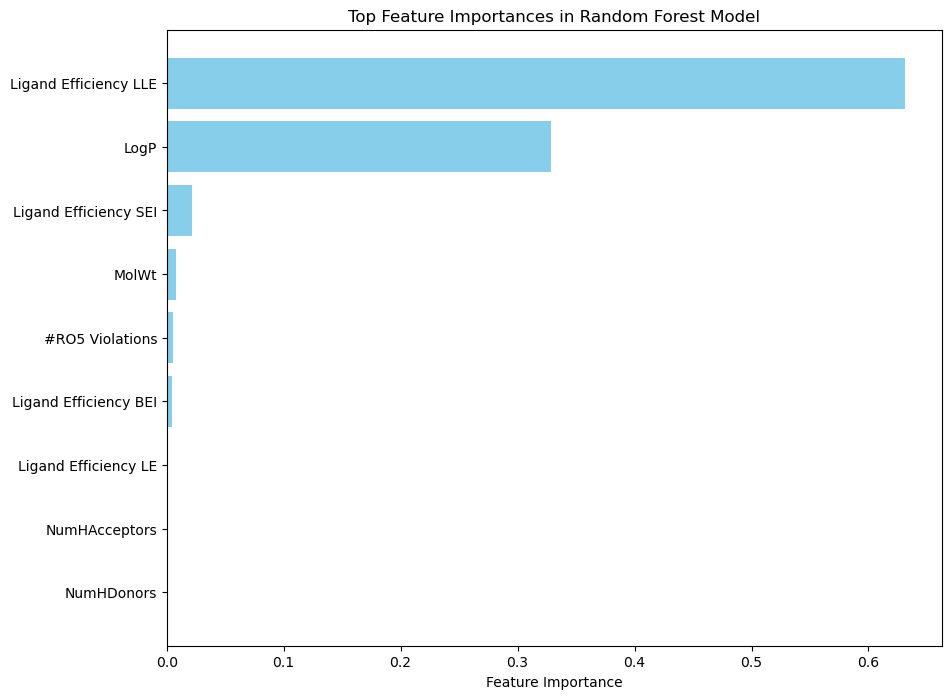

In [51]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

### Summary of Feature Importance Plot

This plot displays the **top feature importances** in the Random Forest model:

- **Top Features**:
  - **Ligand Efficiency LLE** and **LogP** are the most influential features, contributing significantly to the model’s predictions.
  - Other features, such as **Ligand Efficiency SEI**, **Molecular Weight (MolWt)**, and **#RO5 Violations**, have lesser but still notable importance.
  
- **Insight**:
  - This chart highlights which molecular descriptors are most relevant for predicting bioactivity (pIC50) against the EGFR target.
  - The dominance of Ligand Efficiency LLE and LogP suggests that these descriptors have a strong impact on the bioactivity of compounds in this dataset.

This visualisation assists in understanding the model’s decision-making process and identifying key factors driving bioactivity predictions.


This block performs a **correlation analysis** on the top features identified from the feature importance analysis:

1. **Select Top Features**:
   - Defines a list of the top features (`Ligand Efficiency LLE`, `LogP`, `Ligand Efficiency SEI`, `MolWt`, `#RO5 Violations`, `Ligand Efficiency BEI`) based on their importance scores.
   - Adds `Standard Value` (pIC50) as the target variable for correlation comparison.

2. **Compute Correlation Matrix**:
   - Calculates the correlation matrix for these selected features, quantifying the relationships between features and with the bioactivity target.

3. **Visualise Correlation Matrix**:
   - Uses a heatmap (`seaborn.heatmap`) with the `coolwarm` color map for a clear, color-coded display.
   - Annotates each cell with correlation values (`fmt='.2f'`) and adds a title for context.

This analysis highlights potential feature interdependencies and shows which descriptors correlate most strongly with bioactivity.

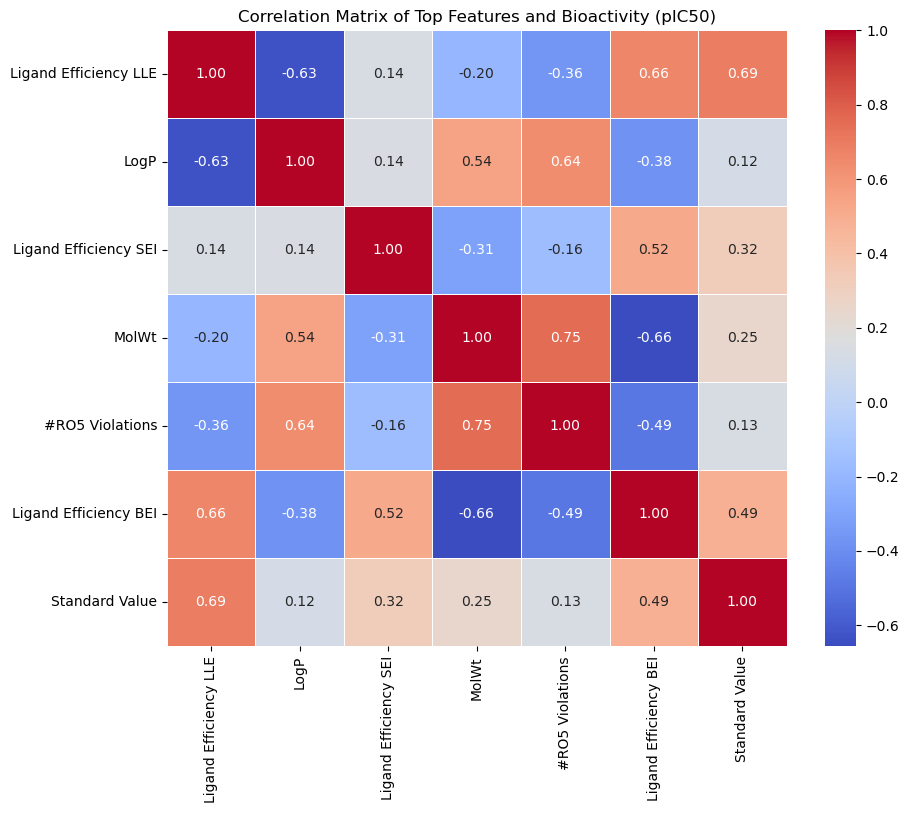

In [52]:
# Select the top features from the previous analysis (all which show a blue bar)
top_features = ['Ligand Efficiency LLE', 'LogP', 'Ligand Efficiency SEI', 'MolWt', '#RO5 Violations', 'Ligand Efficiency BEI']

# Add the target (Standard Value) for correlation analysis
top_features.append('Standard Value')

# Perform correlation analysis
correlation_matrix = data_cleaned[top_features].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Top Features and Bioactivity (pIC50)")
plt.show()

### Summary of Correlation Matrix

This heatmap shows the **correlation matrix** of top features and bioactivity (pIC50 values):

- **Key Correlations**:
  - **Ligand Efficiency LLE** has a strong positive correlation (0.69) with the **Standard Value** (pIC50), suggesting its importance in bioactivity prediction.
  - **Ligand Efficiency BEI** and **Ligand Efficiency SEI** also show moderate positive correlations with pIC50 (0.49 and 0.32, respectively).
  - **LogP** and **Molecular Weight (MolWt)** display weaker correlations with pIC50 (0.12 and 0.25), indicating a less direct impact on bioactivity.

- **Feature Interdependencies**:
  - Notable positive correlations exist between **#RO5 Violations** and **MolWt** (0.75), as well as between **LogP** and **#RO5 Violations** (0.64), indicating potential interdependencies between these features.

This matrix provides insight into the relationships between molecular descriptors and bioactivity, helping to identify which features are most relevant for bioactivity predictions.

# Further data filtering and Analysis

This block filters and counts the **active compounds** based on pIC50 values:

1. **Define Active Compounds**:
   - Filters the dataset to include only compounds with `Standard Value` (pIC50) values of 6 or higher, typically indicating a higher level of bioactivity.

2. **Count Active Compounds**:
   - Prints the total number of active compounds that meet this criterion.

This step identifies potent compounds in the dataset, which may be of particular interest in bioactivity analysis.

In [53]:
active_compounds = data_cleaned[data_cleaned['Standard Value'] >= 6]
print(f"Number of active compounds (pIC50 ≥ 6): {active_compounds.shape[0]}")

Number of active compounds (pIC50 ≥ 6): 7818


This block identifies **high-potential EGFR inhibitors** based on a bioactivity threshold and visualizes the pIC50 distribution:

1. **Define Bioactivity Threshold**:
   - Sets a threshold for high bioactivity as `pIC50 ≥ 6`, identifying compounds with potent inhibitory effects.

2. **Filter High-Potential Compounds**:
   - Filters the dataset to retain only compounds with `Standard Value` (pIC50) equal to or greater than this threshold.
   - Sorts and displays these compounds based on their pIC50 values, listing key features (`Smiles`, `MolWt`, `LogP`, `Ligand Efficiency LLE`, `Standard Value`) for easier examination.

3. **Plot pIC50 Distribution**:
   - Plots a histogram of pIC50 values to show the distribution of bioactivity across the dataset.
   - Marks the bioactivity threshold with a red dashed line, visually highlighting the range of high-potential compounds.

This analysis identifies and displays compounds with high potential as effective EGFR inhibitors, supporting bioactivity-focused compound selection.

Top high-potential EGFR inhibitors:
                                                  Smiles    MolWt     LogP  \
9945   C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4c...  585.709  5.07500   
2592                 Cn1cnc2cc3ncnc(Nc4cccc(Br)c4)c3cc21  354.211  4.02260   
7153   Cc1cc2cc(n1)-c1cnn(C)c1OCCC[C@@H](C)CN1/C(=N/C...  542.688  3.77492   
10345  COc1cc(N2CCC(N(C)C)CC2)ccc1Nc1ncc(C(=O)Oc2cccc...  562.674  6.12670   
3110   CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...  557.054  5.93248   
...                                                  ...      ...      ...   
6676         COC(=O)c1ccc2c(c1)S(=O)(=O)N=S2c1ccc(Br)cc1  400.275  3.15790   
69     Cc1cc2cc(Nc3ccnc4cc(-c5ccc(CNCCO)cc5)sc34)ccc2...  428.561  5.57852   
10132  COc1cc(N2CCN(S(C)(=O)=O)CC2)ccc1Nc1nccc(-c2c(-...  710.767  5.82260   
1741   CCN(CC)CCCCNc1ncc2cc(-c3c(Cl)cccc3Cl)c(NC(=O)N...  552.510  7.17650   
4930   COc1ccn2c(-c3ccnc(Nc4ccc(N5CCC(N6CCCCC6)CC5)cc...  774.873  8.21290   

       Ligand Efficiency LL

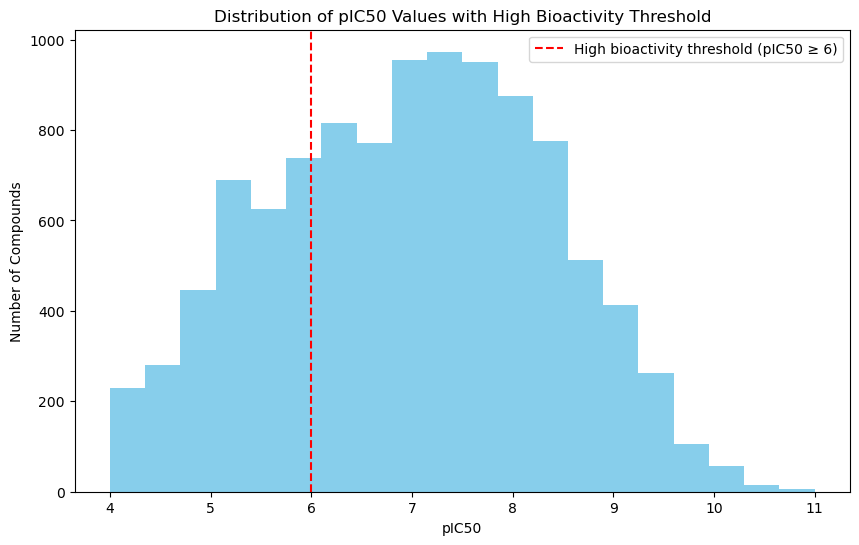

In [54]:
# Set bioactivity threshold for high-potential compounds
bioactivity_threshold = 6

# Filter compounds with pIC50 ≥ threshold
high_potential_compounds = data_cleaned[data_cleaned['Standard Value'] >= bioactivity_threshold]

# Display the top high-potential compounds based on pIC50 values
top_compounds = high_potential_compounds[['Smiles', 'MolWt', 'LogP', 'Ligand Efficiency LLE', 'Standard Value']].sort_values(by='Standard Value', ascending=False)
print("Top high-potential EGFR inhibitors:")
print(top_compounds)

# Plot the distribution of pIC50 values
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Standard Value'], bins=20, color='skyblue')
plt.axvline(bioactivity_threshold, color='red', linestyle='--', label=f'High bioactivity threshold (pIC50 ≥ {bioactivity_threshold})')
plt.xlabel('pIC50')
plt.ylabel('Number of Compounds')
plt.title('Distribution of pIC50 Values with High Bioactivity Threshold')
plt.legend()
plt.show()

### Summary of pIC50 Distribution Plot

This histogram shows the **distribution of pIC50 values** across the dataset:

- **Distribution**:
  - The majority of compounds have pIC50 values between 5 and 8, with a peak around 7-8, indicating that most compounds exhibit very strong bioactivity.

- **High Bioactivity Threshold**:
  - The red dashed line represents the high bioactivity threshold (pIC50 ≥ 6).
  - Compounds to the right of this line are considered high-potential bioactive compounds.

This plot provides an overview of the dataset’s bioactivity range and highlights the proportion of compounds meeting the high bioactivity criterion.

This block calculates the **percentage of high-potential compounds** in the dataset:

1. **Calculate Totals**:
   - Retrieves the total number of compounds and the number of high-potential compounds (pIC50 ≥ 6).

2. **Compute Percentage**:
   - Calculates the percentage of high-potential compounds by dividing the count of high-potential compounds by the total number of compounds, then multiplying by 100.
   - Prints the result to two decimal places.

This provides an overview of the dataset's composition, showing the proportion of compounds that meet the high bioactivity threshold.


In [55]:
total_compounds = data_cleaned.shape[0]
high_potential_count = high_potential_compounds.shape[0]

# Calculate the percentage
percentage_high_potential = (high_potential_count / total_compounds) * 100
print(f"Percentage of high-potential compounds: {percentage_high_potential:.2f}%")

Percentage of high-potential compounds: 74.50%


This block analyses and visualises the **distribution of high-potential compounds** across various pIC50 thresholds:

1. **Define Thresholds**:
   - Sets pIC50 thresholds `[6, 7, 8, 9, 10]` to examine the proportion of compounds with increasingly higher bioactivity levels.

2. **Calculate Percentages**:
   - Iterates over each threshold to filter compounds meeting or exceeding each pIC50 level.
   - Calculates the percentage of compounds at each threshold and appends the values to a list.
   - Prints the percentage for each threshold, giving an overview of high-potential compounds at various bioactivity levels.

3. **Plot Results**:
   - Plots the thresholds against the percentages, providing a visual representation of the compound distribution across bioactivity thresholds.

This analysis helps identify how compound bioactivity varies across the dataset, highlighting the distribution of highly active compounds.


Percentage of compounds with pIC50 ≥ 6: 74.50%
Percentage of compounds with pIC50 ≥ 7: 51.63%
Percentage of compounds with pIC50 ≥ 8: 25.59%
Percentage of compounds with pIC50 ≥ 9: 7.10%
Percentage of compounds with pIC50 ≥ 10: 0.70%


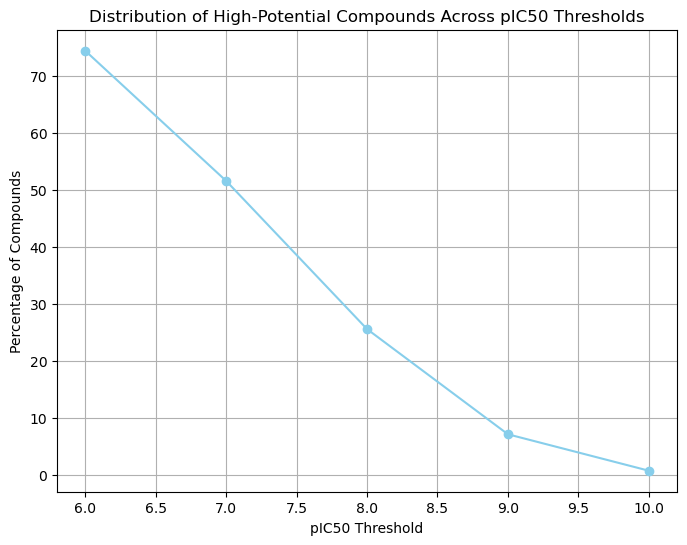

In [56]:
# Define pIC50 thresholds
thresholds = [6, 7, 8, 9, 10]

# Calculate the percentage of compounds above each threshold
percentages = []
total_compounds = data_cleaned.shape[0]

for threshold in thresholds:
    high_potential_compounds = data_cleaned[data_cleaned['Standard Value'] >= threshold]
    percentage = (high_potential_compounds.shape[0] / total_compounds) * 100
    percentages.append(percentage)
    print(f"Percentage of compounds with pIC50 ≥ {threshold}: {percentage:.2f}%")

# Plot the distribution of high-potential compounds across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, percentages, marker='o', color='skyblue')
plt.xlabel('pIC50 Threshold')
plt.ylabel('Percentage of Compounds')
plt.title('Distribution of High-Potential Compounds Across pIC50 Thresholds')
plt.grid(True)
plt.show()

### Summary of High-Potential Compounds Distribution Plot

This line plot shows the **percentage of high-potential compounds** across different pIC50 thresholds:

- **Trend**:
  - There is a clear decline in the percentage of compounds as the pIC50 threshold increases.
  - Approximately 70% of compounds meet the threshold at pIC50 ≥ 6, but this decreases significantly at higher thresholds, with less than 10% meeting pIC50 ≥ 9.

- **Insight**:
  - This distribution indicates that fewer compounds exhibit very high bioactivity (pIC50 ≥ 9 or 10), while a majority exhibit moderate to high bioactivity around pIC50 ≥ 6 or 7.

This plot provides insights into the distribution of bioactivity, helping to understand the concentration of high-bioactivity compounds in the dataset.


This block performs **5-fold cross-validation** on a Random Forest model, evaluating its performance using R² and RMSE metrics:

1. **Initialise Model**:
   - Sets up a `RandomForestRegressor` with `500 trees` to balance model accuracy and computation time.

2. **Define RMSE Scorer**:
   - Creates a custom scoring function for RMSE using `make_scorer`, ensuring RMSE calculations are in the original units of the target variable.

3. **Cross-Validation**:
   - Performs 5-fold cross-validation to evaluate model performance on the entire dataset (`X_scaled`, `y`).
   - Computes R² scores using `scoring='r2'` and RMSE scores with the custom `rmse_scorer`.

4. **Display Results**:
   - Prints the mean and standard deviation for both R² and RMSE scores, providing insight into model stability and performance.

This step gives a robust assessment of model accuracy and error consistency across folds.

In [57]:
# Initialise the RandomForestRegressor with fewer trees to reduce computation time
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Define a custom scoring function for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 5-fold cross-validation for both R2 and RMSE
r2_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='r2')
rmse_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring=rmse_scorer)

# Display the results
print(f"Mean R² Score: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")
print(f"Mean RMSE Score: {np.mean(rmse_scores):.3f} ± {np.std(rmse_scores):.3f}")

Mean R² Score: 0.994 ± 0.001
Mean RMSE Score: 0.105 ± 0.006


This block trains a **Random Forest model** on a subset of compounds with high bioactivity (pIC50 ≥ 8) and analyses feature importance:

1. **Filter High-pIC50 Compounds**:
   - Selects compounds with `Standard Value` (pIC50) of 8 or higher, focusing on those with significant bioactivity.

2. **Define Features and Target**:
   - Creates separate feature (`X_high_pIC50`) and target (`y_high_pIC50`) variables for this high-pIC50 subset.

3. **Standardise Features**:
   - Standardizes the feature set using `StandardScaler` to ensure normalised input for the model.

4. **Train New Model**:
   - Initialises and trains a `RandomForestRegressor` with `100 trees` on this subset, specifically tuned to high-bioactivity compounds.

5. **Compute Feature Importances**:
   - Extracts feature importances from the trained model, indicating the impact of each feature in predicting high pIC50 values.

6. **Display Top Features**:
   - Creates a DataFrame of features with their importance scores, sorting and displaying the top 10.

This targeted analysis reveals which molecular descriptors are most influential for compounds with high bioactivity.

In [58]:
# Filter for high-pIC50 compounds (e.g., pIC50 ≥ 8)
high_pIC50_data = data_cleaned[data_cleaned['Standard Value'] >= 8]

# Define features and target for this subset
X_high_pIC50 = high_pIC50_data.drop(columns=['Smiles', 'Standard Value'])
y_high_pIC50 = high_pIC50_data['Standard Value']

# Standardise features
X_high_pIC50_scaled = scaler.fit_transform(X_high_pIC50)

# Train a new Random Forest model on this subset
rf_model_high_pIC50 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_high_pIC50.fit(X_high_pIC50_scaled, y_high_pIC50)

# Get feature importances
importances_high_pIC50 = rf_model_high_pIC50.feature_importances_

# Create a DataFrame for feature importance
feature_importance_high_pIC50_df = pd.DataFrame({
    'Feature': X_high_pIC50.columns,
    'Importance': importances_high_pIC50
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_high_pIC50_df.head(10))

                 Feature  Importance
3  Ligand Efficiency LLE    0.518824
6                   LogP    0.443031
0        #RO5 Violations    0.009324
4  Ligand Efficiency SEI    0.008694
5                  MolWt    0.007340
1  Ligand Efficiency BEI    0.004469
2   Ligand Efficiency LE    0.004401
7             NumHDonors    0.002358
8          NumHAcceptors    0.001558


This block visualises the **feature importance** for high-pIC50 compounds (pIC50 ≥ 8):

1. **Figure Setup**:
   - Sets the plot size to 10x8 inches for clear visibility.

2. **Bar Plot**:
   - Creates a horizontal bar chart showing the importance of each feature, with features on the y-axis and their importance scores on the x-axis.
   - Uses `color='skyblue'` for a visually appealing display.

3. **Invert Y-Axis**:
   - Inverts the y-axis to display the most important features at the top of the plot.

4. **Labels and Title**:
   - Labels the x-axis as "Feature Importance" and provides a descriptive title.

This plot highlights the key features driving high bioactivity, focusing on compounds with a pIC50 threshold of 8 or higher.


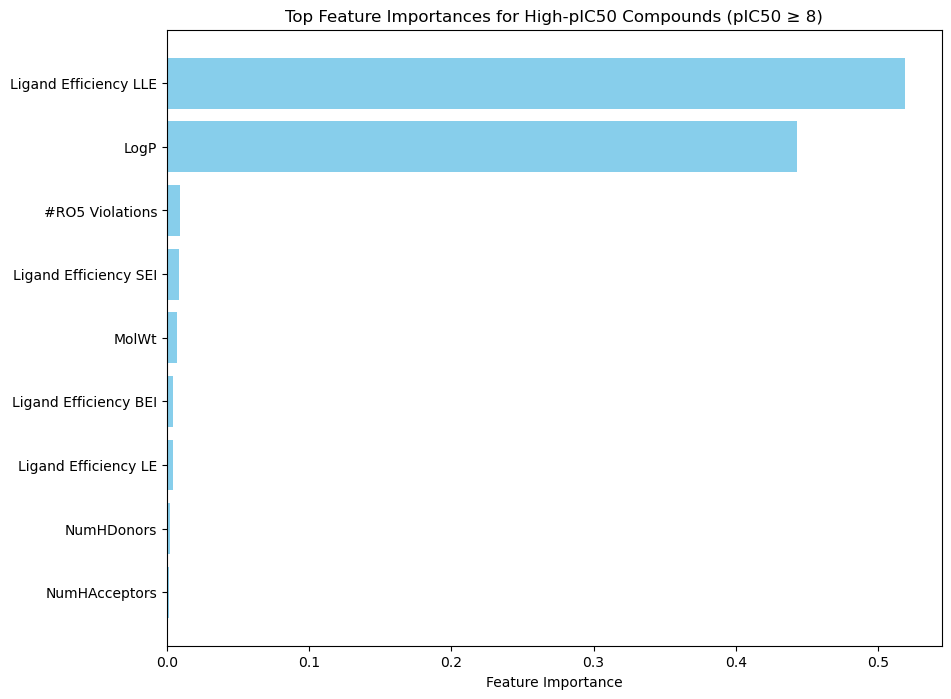

In [59]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_high_pIC50_df['Feature'], feature_importance_high_pIC50_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances for High-pIC50 Compounds (pIC50 ≥ 8)')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

### Summary of Feature Importance for High-pIC50 Compounds (pIC50 ≥ 8)

This bar plot displays the **feature importances** for predicting high-bioactivity compounds (pIC50 ≥ 8) using the Random Forest model:

- **Top Features**:
  - **Ligand Efficiency LLE** and **LogP** are the most significant features, showing the highest importance scores.
  - Other features, such as **#RO5 Violations** and **Ligand Efficiency SEI**, have minor but noticeable importance.

- **Insight**:
  - The prominence of Ligand Efficiency LLE and LogP suggests that these descriptors play a critical role in identifying compounds with high bioactivity (pIC50 ≥ 8).
  
This plot highlights the molecular descriptors most relevant for high-potency compounds, aiding in the selection of key features for predictive modeling.

## Conclusion
In this project, I used a machine learning approach to predict the bioactivity (pIC50) of drug-like compounds against EGFR, a protein involved in cancer growth. I focused on building and fine-tuning a Random Forest model, which allowed me to improve prediction accuracy and identify key molecular features, such as Ligand Efficiency LLE and LogP, that impact bioactivity. By examining highly bioactive compounds and analyzing feature importance, I gained insights that align with established principles in drug chemistry. This project sets the stage for further exploration, including trying classification methods, comparing different models, and exploring real-world deployment to advance EGFR-targeted drug development.